In [ ]:
import sns as sns
This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUST_ID : Identification of Credit Card holder (Categorical) BALANCE : Balance amount left in their account to make purchases ( BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) PURCHASES : Amount of purchases made from account ONEOFF_PURCHASES : Maximum purchase amount done in one-go INSTALLMENTS_PURCHASES : Amount of purchase done in installment CASH_ADVANCE : Cash in advance given by the user PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) CASHADVANCEFREQUENCY : How frequently the cash in advance being paid CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" PURCHASES_TRX : Numbe of purchase transactions made CREDIT_LIMIT : Limit of Credit Card for user PAYMENTS : Amount of Payment done by user MINIMUM_PAYMENTS : Minimum amount of payments made by user PRCFULLPAYMENT : Percent of full payment paid by user TENURE : Tenure of credit card service for user

https://www.kaggle.com/arjunbhasin2013/ccdata

In [10]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Plot styling
import seaborn as sns; sns.set() 
from sklearn.cluster import KMeans
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [8]:
df = pd.read_csv('CCGENERAL.csv') # to import the dataset into a variable
print(df.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [9]:
print(df.shape) # Returns number of columns and rows
df.isnull().any().sum()  # 

(8950, 18)


2

In [4]:
y = df['CUST_ID']
x = df.iloc[:, 1:] # All rows, All columns starting from third 
print(x.head())
print(y.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [122]:
# Check all null values
for col in df:
    print(f'{col}: {df[col].isnull().sum()}')
    

CUST_ID: 0
BALANCE: 0
BALANCE_FREQUENCY: 0
PURCHASES: 0
ONEOFF_PURCHASES: 0
INSTALLMENTS_PURCHASES: 0
CASH_ADVANCE: 0
PURCHASES_FREQUENCY: 0
ONEOFF_PURCHASES_FREQUENCY: 0
PURCHASES_INSTALLMENTS_FREQUENCY: 0
CASH_ADVANCE_FREQUENCY: 0
CASH_ADVANCE_TRX: 0
PURCHASES_TRX: 0
CREDIT_LIMIT: 1
PAYMENTS: 0
MINIMUM_PAYMENTS: 313
PRC_FULL_PAYMENT: 0
TENURE: 0


In [123]:
for column in df:
    print(f'{column}: {df[column].dtype}')
    

CUST_ID: object
BALANCE: float64
BALANCE_FREQUENCY: float64
PURCHASES: float64
ONEOFF_PURCHASES: float64
INSTALLMENTS_PURCHASES: float64
CASH_ADVANCE: float64
PURCHASES_FREQUENCY: float64
ONEOFF_PURCHASES_FREQUENCY: float64
PURCHASES_INSTALLMENTS_FREQUENCY: float64
CASH_ADVANCE_FREQUENCY: float64
CASH_ADVANCE_TRX: int64
PURCHASES_TRX: int64
CREDIT_LIMIT: float64
PAYMENTS: float64
MINIMUM_PAYMENTS: float64
PRC_FULL_PAYMENT: float64
TENURE: int64


In [93]:
pd.Series('CUST_ID').is_unique

True

In [34]:
# https://analyticsindiamag.com/data-pre-processing-in-python/
#https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca

# We have already noticed the missing fields in the data denoted by “nan”. 
# Machine learning models cannot accommodate missing fields in the data 
# they are provided with.So the missing fields must be filled with values 
# that will not affect the variance of the data or make it more noisy.

#The scikit-learn library’s SimpleImputer Class allows us to impute
# the missing fields in a dataset with valid data. In the above code,
# we have used the default strategy for filling missing values which is the mean.

# MEDIAN :Suitable for continuous data with outliers

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="median")
x_columns_name = x.columns
x = imp.fit_transform(x)
x = pd.DataFrame(data=x, columns=x_columns_name)
print(x.head(60))

#Y = y.reshape(-1,1)
#Y = imp.fit_transform(y)
#Y = y.reshape(-1)

        BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.900749           0.818182      95.40              0.00   
1   3202.467416           0.909091       0.00              0.00   
2   2495.148862           1.000000     773.17            773.17   
3   1666.670542           0.636364    1499.00           1499.00   
4    817.714335           1.000000      16.00             16.00   
5   1809.828751           1.000000    1333.28              0.00   
6   1823.652743           1.000000     436.20              0.00   
7   1014.926473           1.000000     861.49            661.49   
8    152.225975           0.545455    1281.60           1281.60   
9   1293.124939           1.000000     920.12              0.00   
10   630.794744           0.818182    1492.18           1492.18   
11  1516.928620           1.000000    3217.99           2500.23   
12   921.693369           1.000000    2137.93            419.96   
13  2772.772734           1.000000       0.00              0.0

In [41]:
df = pd.concat([y, x], axis=1)
print(df.shape)
print(df.head)

(8950, 18)
<bound method NDFrame.head of      CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH

In [28]:
print(x.shape) # Returns number of columns and rows
x.isnull().any().sum()  # 


(7434, 17)


1

In [68]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x))
print(z)

x.columns

[[0.73198937 0.24943448 0.42489974 ... 0.3024     0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.09749953 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.0932934  0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.32687479 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.33830497 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.3243581  0.52555097 4.12276757]]


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [69]:
print(len(np.where(z > 3)[0]))

dataset = df[(z < 3).all(axis=1)]

print(dataset.shape)
print(dataset.columns)

2311
(7434, 18)
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')


In [61]:
print(dataset.shape) # Returns number of columns and rows
print(dataset.isnull().any().sum())
dataset.head()

(7434, 18)
0


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [31]:
y = dataset['CUST_ID']
x = dataset.iloc[:, 1:] # All rows, All columns starting from third 
print(x.head())
print(y.head())
print(x.shape)
print(y.shape)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [35]:
# Check all null values
for col in x:
    print(f'{col}: {x[col].isnull().sum()}')

BALANCE: 0
BALANCE_FREQUENCY: 0
PURCHASES: 0
ONEOFF_PURCHASES: 0
INSTALLMENTS_PURCHASES: 0
CASH_ADVANCE: 0
PURCHASES_FREQUENCY: 0
ONEOFF_PURCHASES_FREQUENCY: 0
PURCHASES_INSTALLMENTS_FREQUENCY: 0
CASH_ADVANCE_FREQUENCY: 0
CASH_ADVANCE_TRX: 0
PURCHASES_TRX: 0
CREDIT_LIMIT: 0
PAYMENTS: 0
MINIMUM_PAYMENTS: 0
PRC_FULL_PAYMENT: 0
TENURE: 0


In [47]:
x.describe().transpose()



,count,mean,std,min,25%,50%,75%,max
BALANCE,7434.0,1269.831784,1517.952340,0.001214,120.946159,790.090769,1750.662783,7803.071972
BALANCE_FREQUENCY,7434.0,0.889646,0.213397,0.181818,0.909091,1.000000,1.000000,1.000000
PURCHASES,7434.0,753.123265,1025.441760,0.000000,46.687500,360.955000,1023.372500,7323.380000
ONEOFF_PURCHASES,7434.0,431.275673,793.561465,0.000000,0.000000,35.000000,520.000000,5497.040000
INSTALLMENTS_PURCHASES,7434.0,322.112279,506.012658,0.000000,0.000000,88.915000,443.250000,3119.280000
CASH_ADVANCE,7434.0,671.957249,1235.334487,0.000000,0.000000,0.000000,889.266455,7232.069823
PURCHASES_FREQUENCY,7434.0,0.485746,0.396350,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,7434.0,0.192344,0.287619,0.000000,0.000000,0.083333,0.250000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,7434.0,0.357495,0.392628,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,7434.0,0.109677,0.158778,0.000000,0.000000,0.000000,0.166667,0.727273


Text(0.5, 0, 'CREDIT_LIMIT / BALANCE')

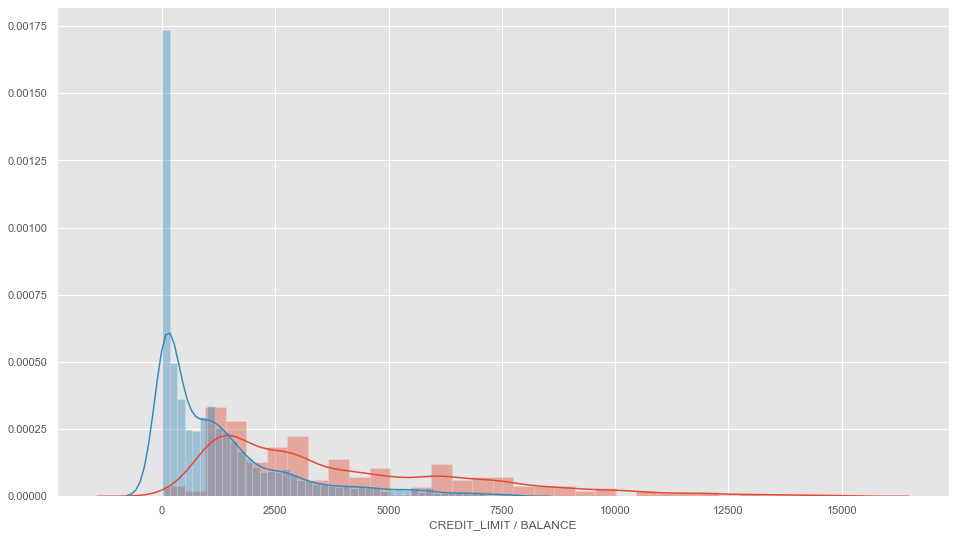

In [29]:
#Visualizing the data - displot
plot_income = sns.distplot(x["CREDIT_LIMIT"])
plot_spend = sns.distplot(x["BALANCE"])
plt.xlabel('CREDIT_LIMIT / BALANCE')

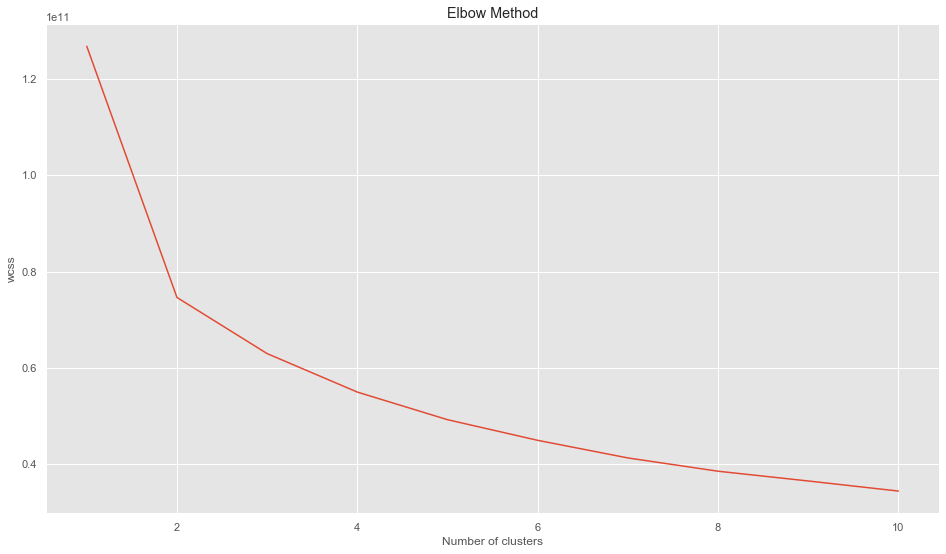

In [63]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,
              init='k-means++',
              max_iter=300,
              n_init=10,
              random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [51]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)# Adding cluster to the Dataset1
x['cluster'] = cluster#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(x.groupby('cluster').mean(),1))
kmeans_mean_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
1,796.6,0.9,458.9,218.4,240.8,416.1,0.4,0.1,0.3,0.1,2.0,8.9,2008.9,838.7,481.1,0.1,11.7
2,770.2,0.9,1334.9,814.9,520.5,195.7,0.6,0.3,0.5,0.0,0.8,19.1,5716.4,1524.2,321.4,0.3,11.9
3,3995.1,1.0,566.3,334.6,231.8,2851.8,0.3,0.1,0.2,0.3,7.3,9.1,6264.9,2545.5,1473.3,0.0,11.8
4,1960.2,0.9,1641.1,1113.9,527.3,539.9,0.6,0.4,0.4,0.1,1.3,21.0,10557.7,2179.7,609.1,0.2,11.9


In [58]:
x.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,3.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,2.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.0


             pca1         pca2
0    -3542.606058  -497.178150
1     4504.498501  4493.068832
2     3334.418898  -826.391656
3     3147.134824 -1683.170224
4    -3062.730942   121.615211
...           ...          ...
7429 -3916.437971  -298.243653
7430 -3559.388167  -545.856781
7431 -3002.187784   672.083043
7432 -3473.917405  -515.250264
7433 -3882.065335    74.406346

[7434 rows x 2 columns]


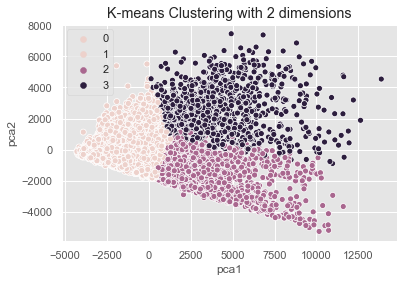

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(x)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

print(results)
sns.scatterplot(x="pca1", y="pca2", hue=y_kmeans1, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [82]:
print(len(x[x['cluster'] == 1]))

4942


             pca1         pca2
0    -3542.606058  -497.178150
1     4504.498501  4493.068832
2     3334.418898  -826.391656
3     3147.134824 -1683.170224
4    -3062.730942   121.615211
...           ...          ...
7429 -3916.437971  -298.243653
7430 -3559.388167  -545.856781
7431 -3002.187784   672.083043
7432 -3473.917405  -515.250264
7433 -3882.065335    74.406346

[7434 rows x 2 columns]


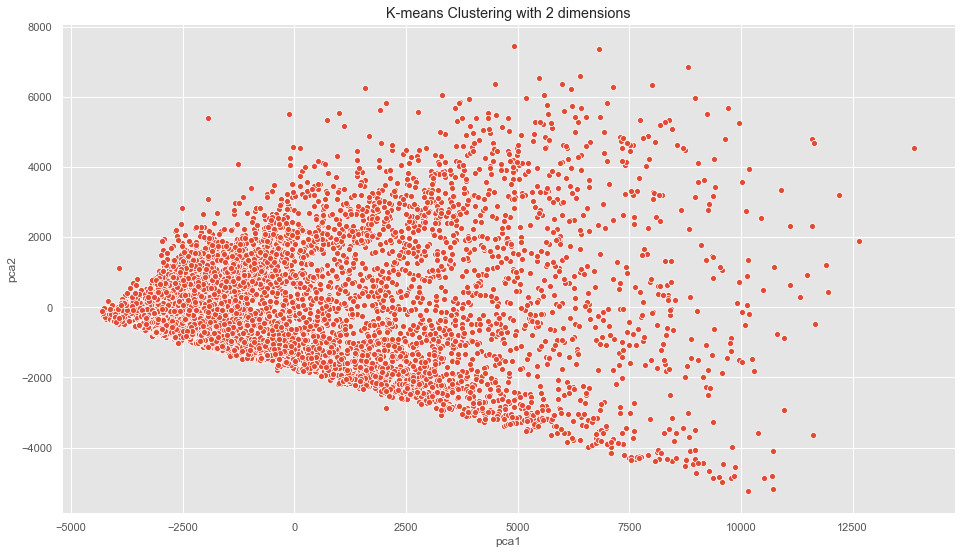

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(x)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

print(results)
sns.scatterplot(x="pca1", y="pca2", data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
##Fitting kmeans to the dataset with k=4
from sklearn.cluster import KMeans
km4 = KMeans(n_clusters=6,
           init='k-means++',
           max_iter=300,
           n_init=10,
           random_state=0)
y_means = km4.fit_predict(x_new)

In [42]:
print(y_means)

[0 2 3 ... 0 0 0]


In [54]:
lables = KMeans(3, random_state=0).fit_predict(x_new)

In [55]:
lables

array([0, 2, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Get the cluster centroids
print(lables.cluster_centers_)
    
# Get the cluster labels
print(lables.labels_)

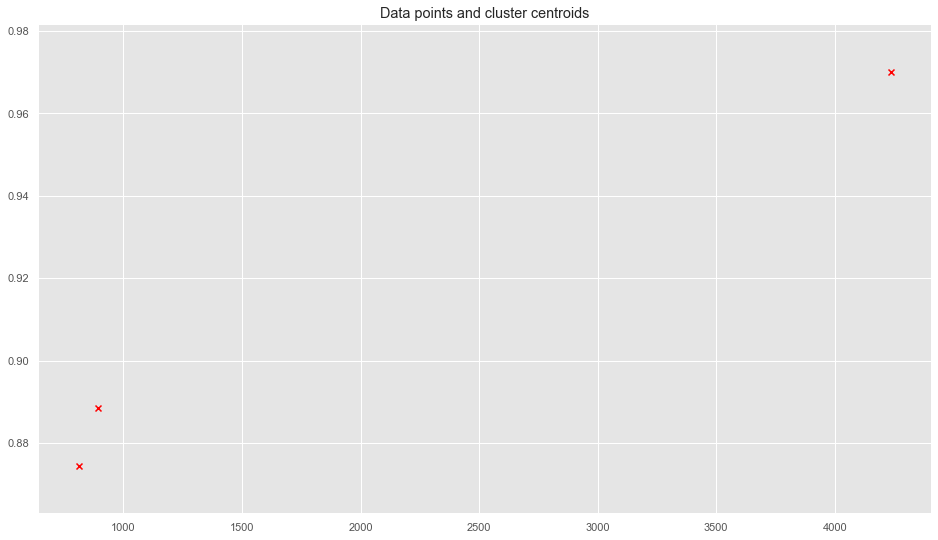

In [162]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [ ]:
plt.scatter(x,y. c=y_means,
            s=50, cmap='viridis');

ValueError: x and y must be the same size

In [34]:
#Visualizing the clusters for k=4
plt.scatter(x[y_means==0,0],
            x[y_means==0,1],
            s=50,
            c='purple',
            label='Cluster1')

TypeError: '(array([False,  True,  True, ..., False, False, False]), 0)' is an invalid key

In [ ]:
plt.scatter(x[y_means==1,0],
            x[y_means==1,1],
            s=50,
            c='blue',
            label='Cluster2')
plt.scatter(x[y_means==2,0],
            x[y_means==2,1],
            s=50,
            c='green',
            label='Cluster3')
plt.scatter(x[y_means==3,0],
            x[y_means==3,1],
            s=50, c='cyan',
            label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()



[ 2.13635938  7.40962324  5.09961887  7.81491465  1.89254207  0.26165417
  1.59701749  4.38117707  8.43209665  8.66043846  2.77780226  8.3538914
  4.50399192  6.89479938 -0.029199    3.95647753  4.53068484  0.5070483
  3.13165795  2.20451529  1.2908219   1.18655254  5.03725437  2.85164868
  2.60516867  4.69595848  0.86612328  4.7096473   2.30437816  4.02683656
  7.87437368  7.37851598  4.18069237  6.7665223   7.94095139  7.43952498
  7.48420129  7.98635066  2.47947561  0.66309163  3.59540802  2.05520738
  5.47425256  4.21078127  2.46098693  2.76820711  8.10269597  2.74574995
  7.56915836  1.50976729  3.4838387   0.62123179  7.61714473  0.75491062
  2.05538289  2.8221382   7.80870276  1.97550822  7.72830656  0.92896271
  7.3020772   4.32288566  9.28293222  2.95323761  3.10677258  2.7842772
  7.51178724  0.95071691  7.84766052  3.21418433  4.17880807  3.32858293
  8.06300134  2.9742542   1.9238532   8.45312331  2.97449321  4.72773123
  0.70606661  8.20559195  0.08963316  4.08614263  1.05

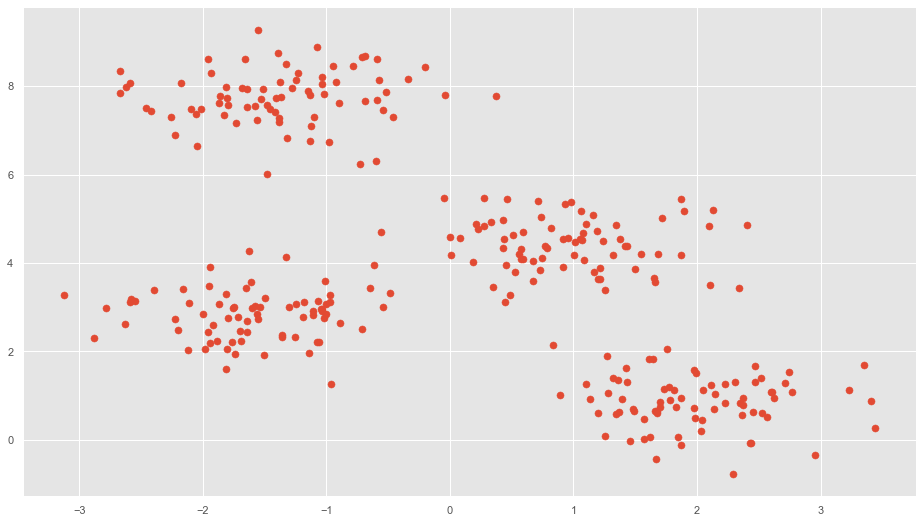

In [30]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

print(X[:, 1])



In [77]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_new)#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)# Adding cluster to the Dataset1
x['cluster'] = cluster#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(x.groupby('cluster').mean(),1))
kmeans_mean_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
1.0,1602.6,0.9,988.8,582.1,406.9,943.8,0.5,0.2,0.4,0.1,3.3,15.1,4688.4,1723.7,891.8,0.1,11.6
2.0,1836.5,0.9,1167.6,756.3,411.4,1091.4,0.5,0.2,0.4,0.1,3.4,15.2,5161.7,2060.1,881.0,0.2,11.7
3.0,1705.3,0.9,1039.2,617.8,421.6,1022.4,0.5,0.2,0.4,0.1,3.1,15.2,4966.9,1762.4,835.1,0.1,11.7
4.0,1879.6,0.9,1152.4,769.5,382.9,1196.1,0.5,0.2,0.3,0.1,3.5,15.1,5016.1,2047.2,964.2,0.1,11.6
5.0,1931.6,0.9,1206.3,749.9,457.1,1080.7,0.5,0.2,0.3,0.1,3.5,15.0,5415.7,2161.0,979.9,0.1,11.7
6.0,1668.7,0.9,1188.8,722.6,466.7,1042.1,0.5,0.2,0.4,0.1,3.3,17.1,4761.1,1909.8,946.0,0.2,11.6
7.0,2092.0,0.9,1113.3,620.5,492.8,1115.5,0.5,0.2,0.4,0.1,3.4,16.7,5570.3,2081.4,890.3,0.1,11.7
8.0,1864.6,0.9,1088.6,620.4,468.3,1298.5,0.5,0.2,0.4,0.2,3.8,15.8,5389.3,2252.3,834.4,0.1,11.6


In [68]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [73]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

# Get the cluster labels
x_new[:, 0]

[[ 812.70789    0.87445  531.73975  266.21177  265.85153  431.33611
     0.45672    0.13674    0.35092    0.0973     1.94516    9.79098
  2262.34667  930.12473  477.52218    0.14848   11.6983 ]
 [ 894.28869    0.88843 1499.11755  966.55546  532.77951  194.9459
     0.65832    0.38334    0.44577    0.03955    0.7207    20.07747
  7640.90909 1744.77681  340.72876    0.25904   11.88932]
 [4236.29674    0.97015  698.97069  424.53517  274.47184 2682.24919
     0.35852    0.17293    0.24966    0.28634    6.78452   10.89121
  7129.76417 2478.50367 1474.55704    0.01821   11.79916]]
[0 2 1 ... 0 0 0]


TypeError: '(slice(None, None, None), 0)' is an invalid key

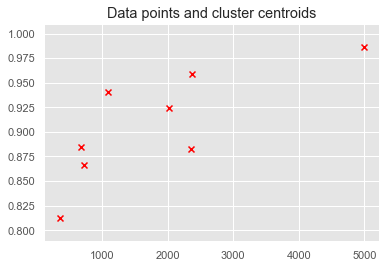

In [78]:
# Plotting the cluster centers and the data points on a 2D plane
#plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [ ]:
import pandas as pd
import seaborn as ssns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(x)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

print(results)
sns.scatterplot(x="pca1", y="pca2", data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

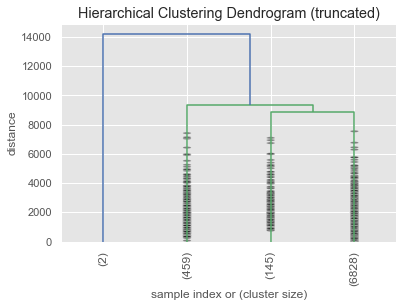

In [50]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)  # suppress scientific float notation#creating the linkage matrix
H_cluster = linkage(x,'average')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [ ]:
y_kmeans1=y_kmeans+1# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)# Adding cluster to the Dataset1
x['cluster'] = cluster#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(x.groupby('cluster').mean(),1))
kmeans_mean_cluster

In [46]:
H_cluster

array([[  4299.  ,   7065.  ,      4.85,      2.  ],
       [  3428.  ,   6149.  ,     11.31,      2.  ],
       [  7201.  ,   7233.  ,     12.51,      2.  ],
       ...,
       [ 14858.  ,  14863.  , 127216.14,   2005.  ],
       [ 14862.  ,  14864.  , 130007.28,   2757.  ],
       [ 14861.  ,  14865.  , 311318.25,   7434.  ]])

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 127216.14172744579, 127216.14172744579, 0.0],
  [0.0, 130007.27696021684, 130007.27696021684, 127216.14172744579],
  [0.0, 311318.2460942234, 311318.2460942234, 130007.27696021684]],
 'ivl': ['(4677)', '(752)', '(638)', '(1367)'],
 'leaves': [14861, 14862, 14858, 14863],
 'color_list': ['g', 'g', 'b']}

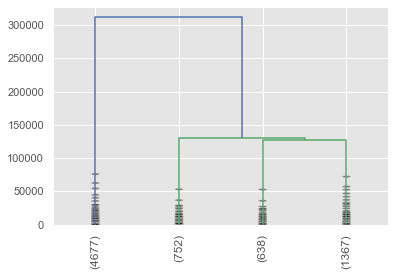

In [47]:
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

In [4]:
import numpy as np
constant = 1.0 / np.sqrt(2*np.pi)
print(constant)

0.3989422804014327
0.3989422804014327
0.3989422804014327


In [8]:
x = 8
mean = 5
std = 1
np.exp(2.71828**((-(x-mean)**2) / (2 * std **2)))



1.0111709645713853